In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeans:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def _initialize_centroids(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _compute_distances(self, X, centroids):
        return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    def _assign_clusters(self, distances):
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for _ in range(self.max_iters):
            distances = self._compute_distances(X, self.centroids)
            labels = self._assign_clusters(distances)
            new_centroids = self._update_centroids(X, labels)

            # Kiểm tra hội tụ
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            self.centroids = new_centroids

        self.labels_ = self._assign_clusters(self._compute_distances(X, self.centroids))

    def predict(self, X):
        distances = self._compute_distances(X, self.centroids)
        return self._assign_clusters(distances)

In [3]:
def plot_clusters(X, labels, centroids=None, title=None):
    plt.figure(figsize=(8, 6))

    unique_labels = np.unique(labels)
    for i, label in enumerate(unique_labels):
        plt.scatter(X[labels == label, 0], X[labels == label, 1],
                    s=20, alpha=0.6, label=f'Cluster {label}')

    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    c='red', s=50, label='Centroids')

    plt.title(title)
    plt.legend()
    plt.show()


### Assignment 1 (4 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma =
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

In [4]:
np.random.seed(42)
cov = np.array([[1, 0], [0, 1]])
N = 200
mean1 = np.array([2, 2])
mean2 = np.array([8, 3])
mean3 = np.array([3, 6])

In [5]:
data1 = np.random.multivariate_normal(mean1, cov, N)
data2 = np.random.multivariate_normal(mean2, cov, N)
data3 = np.random.multivariate_normal(mean3, cov, N)

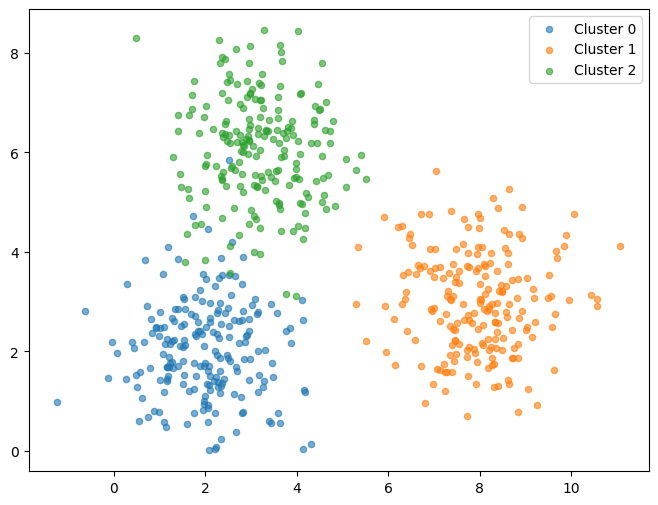

In [6]:
X = np.vstack((data1, data2, data3))
original_label = np.asanyarray([0]*N + [1]*N + [2]*N)
original_fig = plot_clusters(X, original_label)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

Các tâm cụm: 
[[2.02113913 2.01991804]
 [7.93924027 2.98407134]
 [3.19050849 6.10167164]]


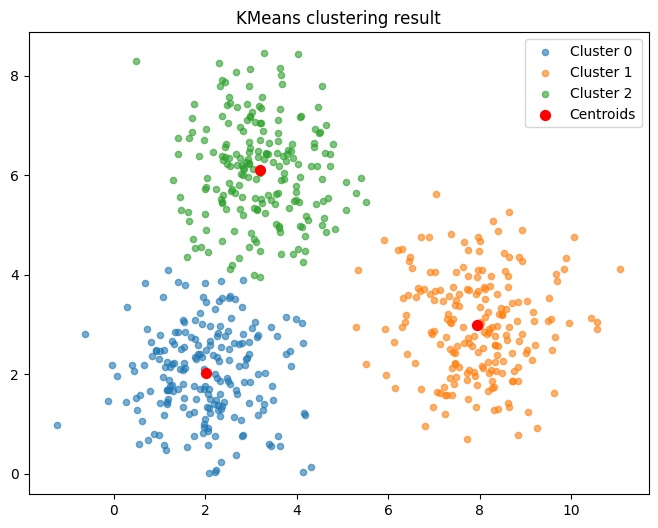

In [8]:
print("Các tâm cụm: ")
print(kmeans.centroids)
plot_clusters(X, kmeans.labels_, centroids=kmeans.centroids, title="KMeans clustering result")

**Nhận xét:**


*   Ba tâm cụm được tìm ra bằng k-means xấp xỉ rất gần với ba vector mean gốc là (2, 2), (8, 3) và (3, 6) cho thấy dữ liệu có phương sai $\Sigma = I$ và sample size đủ lớn (200/cluster) giúp các cụm rõ ràng, phân tách tốt.
*   Bên cạnh đó, khi chạy thuật toán nhiều lần ta nhận thấy kết quả có nhiều sự thay đổi. Như vậy việc khởi tạo tâm cụm ngẫu nhiên trong K-means có ảnh hưởng đến hiệu quả tổng thể, các lần chạy có thể hội tụ vào các local minima khác nhau, dẫn đến centroids lệch so với mean gốc (nhất là khi clusters nằm gần nhau).



### Assignment 2 (4 scores):
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma =
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

In [9]:
np.random.seed(42)
cov = np.array([[1, 0], [0, 1]])

data1 = np.random.multivariate_normal(mean1, cov, 50)
data2 = np.random.multivariate_normal(mean2, cov, 20)
data3 = np.random.multivariate_normal(mean3, cov, 1000)

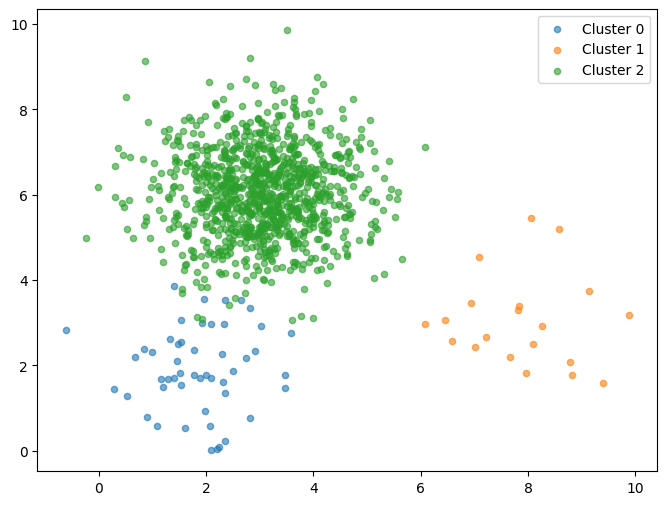

In [10]:
X = np.vstack((data1, data2, data3))
original_label = np.asanyarray([0]*50 + [1]*20 + [2]*1000)
original_fig = plot_clusters(X, original_label)

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

Các tâm cụm: 
[[3.37199813 3.01494961]
 [2.38516541 5.79869154]
 [3.7477644  6.57612327]]


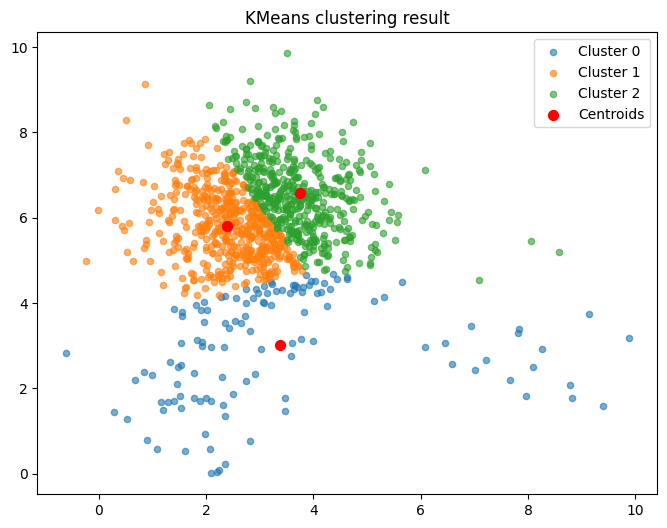

In [12]:
print("Các tâm cụm: ")
print(kmeans.centroids)
plot_clusters(X, kmeans.labels_, centroids=kmeans.centroids, title="KMeans clustering result")

**Nhận xét:**


*   Cluster quanh mean (3, 6) với 1000 điểm chiếm gần như toàn bộ tổng SSE, nên K‑means ưu tiên tối thiểu hóa khoảng cách chủ yếu cho nhóm này. Kết quả là hai cụm nhỏ bị kéo về phía cluster lớn, thay vì giữ đúng vị trí (2, 2) và (8, 3).
*   K‑means bị ảnh hưởng khi phân phối dữ liệu có kích thước các cụm quá chênh lệch — cụm lớn đè bẹp và làm lệch tâm các cụm nhỏ. Điều này ảnh hưởng tới khả năng nhận dạng và phân tách nhóm nhỏ, đặc biệt khi số lượng chênh lệch trên cả độ lớn lẫn density.



### Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where

$$
    \Sigma_1 =
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$

and

$$
\Sigma_2 =
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

In [13]:
np.random.seed(42)
cov1 = np.array([[1, 0], [0, 1]])
cov2 = np.array([[10, 0], [0, 1]])
N = 200
data1 = np.random.multivariate_normal(mean1, cov1, N)
data2 = np.random.multivariate_normal(mean2, cov1, N)
data3 = np.random.multivariate_normal(mean3, cov2, N)

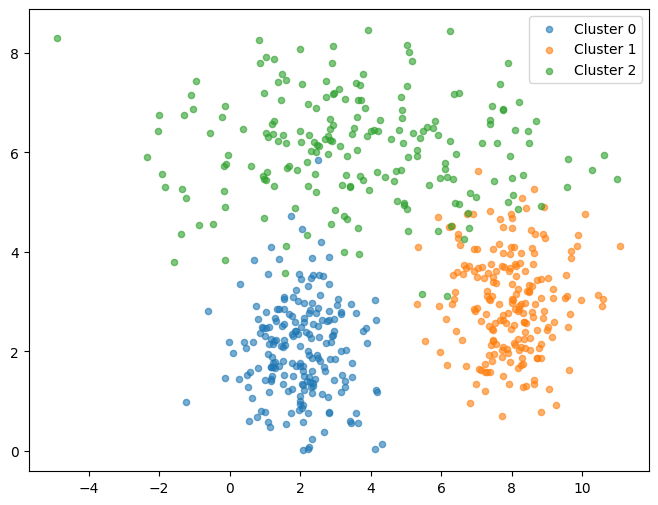

In [14]:
X = np.vstack((data1, data2, data3))
original_label = np.asanyarray([0]*N + [1]*N + [2]*N)
original_fig = plot_clusters(X, original_label)

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

Các tâm cụm: 
[[1.96713809 2.05011551]
 [7.82773082 3.52419383]
 [2.44220016 6.25733703]]


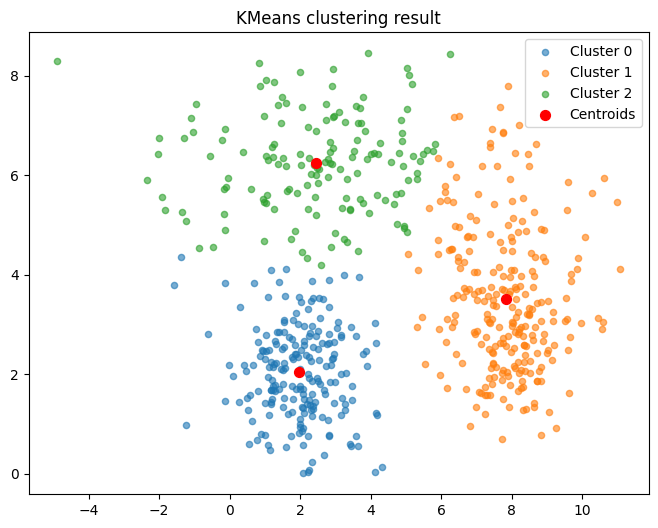

In [16]:
print("Các tâm cụm: ")
print(kmeans.centroids)
plot_clusters(X, kmeans.labels_, centroids=kmeans.centroids, title="KMeans clustering result")

**Nhận xét:**


Phân phối $\mathcal{N}((3, 6), \Sigma_2)$ với phương sai lớn theo chiều ngang đã tạo ra một cụm dữ liệu có hình dạng elip trải rộng. Điều này có thể gây ra những ảnh hưởng sau đến hiệu suất của K-means:
*   Giảm khả năng phân tách: Do phương sai lớn theo chiều ngang của cụm thứ ba, có thể có sự chồng lấn đáng kể giữa cụm này và cụm thứ nhất (có tâm gần (2, 2)) dẫn đến việc phân cụm không chính xác ở các vùng giao nhau.
*   Phân cụm không tối ưu: K-means có thể không thể mô hình hóa tốt hình dạng elip của cụm, dẫn đến việc các điểm dữ liệu ở rìa có thể bị gán nhầm.


